###**Question 1: Explain the fundamental differences between DDL, DML, and DQL commands in SQL. Provide one example for each type of command.**

**Answer:**

SQL (Structured Query Language) commands are categorized based on their functionality.
The three main types are **DDL (Data Definition Language)**, **DML (Data Manipulation Language)**, and **DQL (Data Query Language)**.


###  **1. DDL (Data Definition Language)**
- **Purpose:** Used to define and modify the structure of the database (tables, schemas, indexes, etc.).
- **Affects:** Database schema.
- **Common Commands:** `CREATE`, `ALTER`, `DROP`, `TRUNCATE`.

**Example:**
```sql
CREATE TABLE Employees (
    EmpID INT PRIMARY KEY,
    Name VARCHAR(50),
    Department VARCHAR(30),
    Salary DECIMAL(10,2)
);
```

This command creates a new table named Employees.


### 2. DML (Data Manipulation Language)

Purpose: Used to manipulate or modify data stored in database tables.

Affects: The data inside the tables.

Common Commands: INSERT, UPDATE, DELETE.

Example:

INSERT INTO Employees (EmpID, Name, Department, Salary)
VALUES (1, 'John Doe', 'IT', 55000);


This command inserts a new record into the Employees table.

### 3. DQL (Data Query Language)

Purpose: Used to retrieve data from the database.

Affects: Only fetches data (does not modify it).

Common Command: SELECT.

Example:

SELECT Name, Department, Salary FROM Employees WHERE Department = 'IT';


This command retrieves all employees working in the IT department.
| Type | Full Form                  | Purpose                    | Example Command |
| ---- | -------------------------- | -------------------------- | --------------- |
| DDL  | Data Definition Language   | Defines database structure | `CREATE TABLE`  |
| DML  | Data Manipulation Language | Modifies data in tables    | `INSERT INTO`   |
| DQL  | Data Query Language        | Retrieves data from tables | `SELECT`        |
---

### *Question 2: What is the purpose of SQL constraints? Name and describe three common types of constraints, providing a simple scenario where each would be useful.**

**Answer:**

**SQL Constraints** are rules applied to table columns to ensure the **accuracy**, **reliability**, and **integrity** of the data stored in a database.  
They prevent invalid data from being entered into the database and maintain consistency across records.



###  **Purpose of SQL Constraints**
- To enforce **data integrity**.
- To maintain **consistency** in the database.
- To **avoid errors** or invalid entries.
- To **define relationships** between tables properly.


###**1. PRIMARY KEY Constraint**
- Ensures that each record in a table is **unique** and **not null**.  
- A table can have **only one** primary key.
  
**Example Scenario:**  
Each employee in an organization must have a unique ID.

```sql
CREATE TABLE Employees (
    EmpID INT PRIMARY KEY,
    Name VARCHAR(50),
    Department VARCHAR(30)
);
```

!!!2. FOREIGN KEY Constraint

Maintains referential integrity between two tables.

Ensures that a value in one table matches a valid value in another table’s primary key.

Example Scenario:
An employee’s department must exist in the department table.
``` sql
CREATE TABLE Departments (
    DeptID INT PRIMARY KEY,
    DeptName VARCHAR(50)
);

CREATE TABLE Employees (
    EmpID INT PRIMARY KEY,
    Name VARCHAR(50),
    DeptID INT,
    FOREIGN KEY (DeptID) REFERENCES Departments(DeptID)
);

```
This ensures that every DeptID in Employees exists in the Departments table.
3. CHECK Constraint

Ensures that values in a column meet a specific condition.

Example Scenario:
Employee salary must always be greater than zero.
``` sql
CREATE TABLE Employees (
    EmpID INT PRIMARY KEY,
    Name VARCHAR(50),
    Salary DECIMAL(10,2) CHECK (Salary > 0)
);

```
This prevents inserting or updating a record with a negative salary.

---


###  **Question 3: Explain the difference between LIMIT and OFFSET clauses in SQL. How would you use them together to retrieve the third page of results, assuming each page has 10 records?**

**Answer:**

In SQL, the **`LIMIT`** and **`OFFSET`** clauses are used to control the number of rows returned by a query.  
They are commonly used in **pagination**, where results are divided into pages for easy viewing.


### **1. LIMIT Clause**
- The `LIMIT` clause specifies the **maximum number of rows** to return.  
- Example:  
```sql
  SELECT * FROM Employees LIMIT 10;

```
This retrieves the first 10 records from the Employees table.

### 2. OFFSET Clause

The OFFSET clause tells the database how many rows to skip before starting to return rows.

Example:
```
SELECT * FROM Employees LIMIT 10 OFFSET 10;

```
→ This skips the first 10 rows and then returns the next 10 rows.

 Using LIMIT and OFFSET for Pagination

If each page shows 10 records, then:

Page 1: OFFSET = 0 → Records 1–10

Page 2: OFFSET = 10 → Records 11–20

Page 3: OFFSET = 20 → Records 21–30

SQL Query to Retrieve the Third Page (10 Records per Page):

``` sql
SELECT *
FROM Employees
LIMIT 10 OFFSET 20;
```

This query:

Skips the first 20 records (2 pages × 10 records per page)

Returns the next 10 records (page 3)

---


### **Question 4: What is a Common Table Expression (CTE) in SQL, and what are its main benefits? Provide a simple SQL example demonstrating its usage.**

**Answer:**

A **Common Table Expression (CTE)** is a **temporary result set** that you can reference within a `SELECT`, `INSERT`, `UPDATE`, or `DELETE` statement.  
It makes SQL queries **more readable, organized, and easier to maintain**, especially when working with complex subqueries or recursive queries.



### **Syntax of a CTE**
```sql
WITH cte_name AS (
    SQL_query
)
SELECT * FROM cte_name;

```

Main Benefits of Using CTEs

- Improves Readability – Makes complex queries easier to understand by breaking them into smaller parts.

- Code Reusability – The same temporary result can be referenced multiple times in the main query.

- Simplifies Recursive Queries – Useful for hierarchical data such as employee–manager relationships.

- Better Organization – Helps avoid deeply nested subqueries.

### Example: Find Employees Earning Above the Average Salary
Step 1: Create a CTE to find average salary
```sql
WITH AvgSalary AS (
    SELECT AVG(Salary) AS avg_sal
    FROM Employees
)
```
Step 2: Use the CTE to find employees earning above average
``` sql
SELECT Name, Salary
FROM Employees, AvgSalary
WHERE Employees.Salary > AvgSalary.avg_sal;

```

### Explanation:

The CTE (AvgSalary) first calculates the average salary from the Employees table.

The main query then uses this temporary result to select employees whose salary is greater than the average.

---

### **Question 5: Describe the concept of SQL Normalization and its primary goals. Briefly explain the first three normal forms (1NF, 2NF, 3NF).**

**Answer:**

###  **What is Normalization?**
**SQL Normalization** is a **process of organizing data** in a database to **reduce redundancy** (duplicate data) and **improve data integrity**.  
It divides large tables into smaller, related tables and uses **relationships (foreign keys)** to connect them.


###  **Primary Goals of Normalization**
1. **Eliminate redundant data** (avoid data duplication).  
2. **Ensure data dependencies make sense** (each field depends only on the key).  
3. **Improve data consistency and integrity.**  
4. **Make database maintenance easier** and updates more efficient.


### **1️ First Normal Form (1NF)**
- Each column must contain **atomic (indivisible)** values.  
- There should be **no repeating groups** or arrays in a table.  
- Each record should be **unique**, identified by a primary key.

**Example (Before 1NF):**
| StudentID | Name  | Subjects         |
|------------|-------|-----------------|
| 1          | John  | Math, Science   |

**After 1NF:**
| StudentID | Name  | Subject  |
|------------|-------|----------|
| 1          | John  | Math     |
| 1          | John  | Science  |

### **2️Second Normal Form (2NF)**
- Must satisfy **1NF**.  
- All **non-key attributes** should be **fully dependent on the primary key** (no partial dependency).

**Example (Before 2NF):**
| StudentID | CourseID | CourseName |
|------------|-----------|------------|
| 1          | C101      | Python     |
| 2          | C102      | Java       |

Here, `CourseName` depends only on `CourseID`, not the full key (`StudentID`, `CourseID`).

**After 2NF:**
- **Student Table:** `(StudentID, Name)`  
- **Course Table:** `(CourseID, CourseName)`  
- **Enrollment Table:** `(StudentID, CourseID)`


### **3️ Third Normal Form (3NF)**
- Must satisfy **2NF**.  
- There should be **no transitive dependency** (non-key column depending on another non-key column).

**Example (Before 3NF):**
| EmpID | EmpName | DeptID | DeptName |
|--------|----------|---------|-----------|
| 1      | John     | D1      | HR        |

Here, `DeptName` depends on `DeptID`, not directly on `EmpID`.

**After 3NF:**
- **Employee Table:** `(EmpID, EmpName, DeptID)`  
- **Department Table:** `(DeptID, DeptName)`


**Summary Table**

| Normal Form | Condition | Removes |
|--------------|------------|----------|
| **1NF** | Atomic values, unique rows | Repeating groups |
| **2NF** | Full dependency on primary key | Partial dependency |
| **3NF** | No transitive dependency | Derived dependency |



Normalization ensures your database is **efficient**, **consistent**, and **easy to maintain**, reducing redundancy while preserving data accuracy.

---


### Question 6 : Create a database named ECommerceDB and perform the following tasks:
1. Create the following tables with appropriate data types and constraints:

2. 2. Insert the following records into each table

``` sql
--  creating  database
create database ECommerceDB;

use ECommerceDB;
<!-- Creating tables  -->
create table Categories(
CategoryID INT PRIMARY KEY,
CategoryName VARCHAR(50) NOT NULL UNIQUE
);

create table Products(
ProductID INT PRIMARY KEY,
ProductName VARCHAR(100) NOT NULL UNIQUE,
CategoryID INT,
Price DECIMAL(10,2) NOT NULL,
StockQuantity INT,
FOREIGN KEY(CategoryID) REFERENCES Categories(CategoryID)
);

create table Customers(
CustomerID INT PRIMARY KEY,
CustomerName VARCHAR(100) NOT NULL,
Email VARCHAR(100) UNIQUE,
JoinDate DATE);

create table Orders(
OrderID INT PRIMARY KEY,
CustomerID INT,
OrderDate DATE NOT NULL,
TotalAmount DECIMAL(10,2),
FOREIGN KEY(CustomerID) REFERENCES Customers(CustomerID));

<!-- Inserting Data -->

INSERT INTO Categories (CategoryID, CategoryName) VALUES
(1, 'Electronics'),
(2, 'Books'),
(3, 'Home Goods'),
(4, 'Apparel');

INSERT INTO Products (ProductID, ProductName, CategoryID, Price, StockQuantity) VALUES
(101, 'Laptop Pro', 1, 1200.00, 50),
(102, 'SQL Handbook', 2, 45.50, 200),
(103, 'Smart Speaker', 1, 99.99, 150),
(104, 'Coffee Maker', 3, 75.00, 80),
(105, 'Novel: The Great SQL', 2, 25.00, 120),
(106, 'Wireless Earbuds', 1, 150.00, 100),
(107, 'Blender X', 3, 120.00, 60),
(108, 'T-Shirt Casual', 4, 20.00, 300);

INSERT INTO Customers (CustomerID, CustomerName, Email, JoinDate) VALUES
(1, 'Alice Wonderland', 'alice@example.com', '2023-01-10'),
(2, 'Bob the Builder', 'bob@example.com', '2022-11-25'),
(3, 'Charlie Chaplin', 'charlie@example.com', '2023-03-01'),
(4, 'Diana Prince', 'diana@example.com', '2021-04-26');

INSERT INTO Orders (OrderID, CustomerID, OrderDate, TotalAmount) VALUES
(1001, 1, '2023-04-26', 1245.50),
(1002, 2, '2023-10-12', 99.99),
(1003, 1, '2023-07-01', 145.00),
(1004, 3, '2023-01-14', 150.00),
(1005, 2, '2023-09-24', 120.00),
(1006, 1, '2023-06-19', 20.00);

```
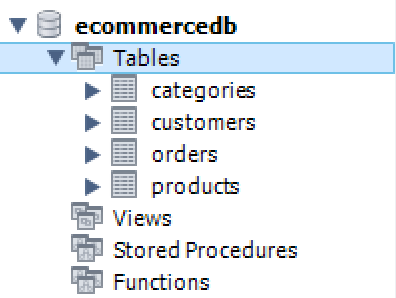

---

### Question 7 : Generate a report showing CustomerName, Email, and the TotalNumberofOrders for each customer. Include customers who have not placed any orders, in which case their TotalNumberofOrders should be 0. Order the results by CustomerName.

``` sql
SELECT c.CustomerName,
    c.Email,
    COUNT(o.OrderID) AS TotalOrders
FROM Customers c
LEFT JOIN Orders o
    ON c.CustomerID = o.CustomerID
GROUP BY c.CustomerID
ORDER BY c.CustomerName;

```
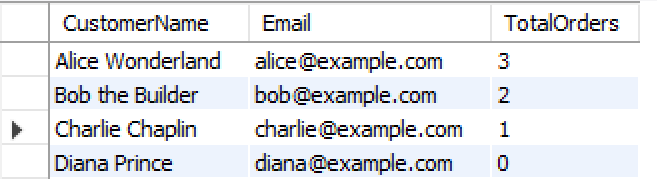

---

### Question 8 : Retrieve Product Information with Category: Write a SQL query to display the ProductName, Price, StockQuantity, and CategoryName for all products. Order the results by CategoryName and then ProductName alphabetically.

```sql
Select p.ProductName, p.Price, p.StockQuantity, c.CategoryName
from Categories c
left join Products p
on c.CategoryID=p.CategoryID
order by CategoryName,ProductName;
```
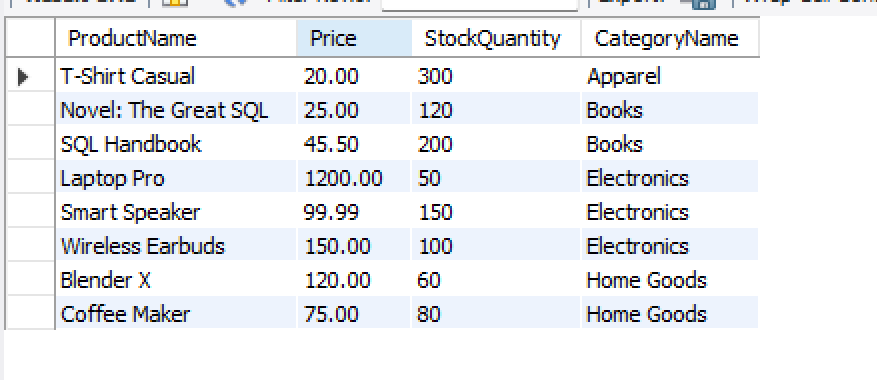

---

### Question 9 : Write a SQL query that uses a Common Table Expression (CTE) and a Window Function (specifically ROW_NUMBER() or RANK()) to display the CategoryName, ProductName, and Price for the top 2 most expensive products in each CategoryName.

```sql
WITH RankedProducts AS (
    SELECT
        c.CategoryName,
        p.ProductName,
        p.Price,
        ROW_NUMBER() OVER (PARTITION BY c.CategoryName ORDER BY p.Price DESC) AS price_rank
    FROM Products p
    JOIN Categories c
        ON p.CategoryID = c.CategoryID
)
SELECT
    CategoryName,
    ProductName,
    Price
FROM RankedProducts
WHERE price_rank <= 2
ORDER BY CategoryName, Price DESC;

```
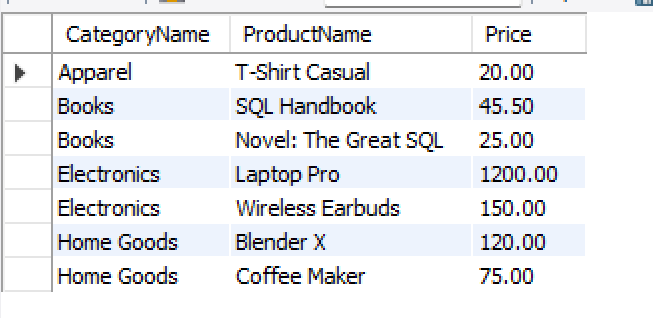

---

### Question 10 : You are hired as a data analyst by Sakila Video Rentals, a global movie rental company. The management team is looking to improve decision-making by analyzing existing customer, rental, and inventory data.Using the Sakila database, answer the following business questions to support key strategic initiatives.
Tasks & Questions:
1. Identify the top 5 customers based on the total amount they’ve spent. Include customer
name, email, and total amount spent.
2. Which 3 movie categories have the highest rental counts? Display the category name
and number of times movies from that category were rented.
3. Calculate how many films are available at each store and how many of those have
never been rented.
4. Show the total revenue per month for the year 2023 to analyze business seasonality.
5. Identify customers who have rented more than 10 times in the last 6 months.

 ANS:

1. Top 5 Customers by Total Spending
This query joins the customer and payment tables, groups by the customer, sums their payments, and then orders the result in descending order, taking only the top 5.

```  sql
SELECT
    CONCAT(c.first_name, ' ', c.last_name) AS customer_name,
    c.email,
    SUM(p.amount) AS total_amount_spent
FROM
    customer c
JOIN
    payment p ON c.customer_id = p.customer_id
GROUP BY
    c.customer_id, customer_name, c.email
ORDER BY
    total_amount_spent DESC
LIMIT 5;

```
2. Top 3 Movie Categories by Rental Counts
This query requires joining five tables to link a rental event to a category name. It then groups by the category name, counts the rentals, and returns the top 3.

``` sql

SELECT
    c.name AS category_name,
    COUNT(r.rental_id) AS rental_count
FROM
    rental r
JOIN
    inventory i ON r.inventory_id = i.inventory_id
JOIN
    film f ON i.film_id = f.film_id
JOIN
    film_category fc ON f.film_id = fc.film_id
JOIN
    category c ON fc.category_id = c.category_id
GROUP BY
    c.name
ORDER BY
    rental_count DESC
LIMIT 3;
```

3. Film Availability and Rental Status per Store
This query checks inventory at each store. It uses a LEFT JOIN from inventory to rental.

total_inventory_items counts all unique inventory copies at that store.

inventory_items_never_rented uses SUM(CASE ...) to count only those inventory items where the rental_id is NULL, meaning they never appeared in the rental table.

``` sql
SELECT
    i.store_id,
    COUNT(i.inventory_id) AS total_inventory_items,
    SUM(CASE WHEN r.rental_id IS NULL THEN 1 ELSE 0 END) AS inventory_items_never_rented
FROM
    inventory i
LEFT JOIN
    rental r ON i.inventory_id = r.inventory_id
GROUP BY
    i.store_id;

```

4. Total Revenue Per Month for 2023
This query aggregates data from the payment table. It filters specifically for the year 2023, then groups by the month number and name, summing the revenue for each.



``` sql
SELECT
    MONTH(payment_date) AS month_number,
    MONTHNAME(payment_date) AS month_name,
    SUM(amount) AS total_revenue
FROM
    payment
WHERE
    YEAR(payment_date) = 2023
GROUP BY
    month_number, month_name
ORDER BY
    month_number;
```

5. Customers with > 10 Rentals in the Last 6 Months
This query finds active customers. It filters the rental table for records within the last 6 months relative to the CURRENT_DATE, groups by customer, and uses a HAVING clause to keep only those with a rental count greater than 10.


``` sql

SELECT
    c.customer_id,
    c.first_name,
    c.last_name,
    c.email,
    COUNT(r.rental_id) AS recent_rental_count
FROM
    customer c
JOIN
    rental r ON c.customer_id = r.customer_id
WHERE
    r.rental_date >= DATE_SUB(CURRENT_DATE, INTERVAL 6 MONTH)
GROUP BY
    c.customer_id, c.first_name, c.last_name, c.email
HAVING
    recent_rental_count > 10;
```